In [27]:
import gzip, pickle, copy, numpy as np, matplotlib.pyplot as plt
from scipy.stats import chi2


In [19]:
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    f = pickle._Unpickler(f)
    f.encoding = 'latin1'
    trainSet, validSet, testSet = f.load()
    mnistData = np.concatenate((trainSet[0], validSet[0], testSet[0]), axis=0)

In [20]:
from gmmlib import dimReducePCA

# reduce the dimension of data to 2 using PCA
mnistData2D, eigenVectors, eigenValues = dimReducePCA(mnistData, 2)

In [21]:
# randomly pick coordinates as center of Gaussian distribution
def randinitMean(n, drange):
    mu = []
    for m in range(n):
        mu.append([np.random.uniform(drange[i]['MIN'], drange[i]['MAX']) for i in range(len(drange))])
    # return inf form of numpy.ndarray
    return np.asarray(mu)

In [22]:
def randinitCovariance(n):
    sigma = []
    for m in range(n):
        # randomly pick a direction
        angle = np.random.uniform(0, 2 * np.pi)
        # create eigen vector with the direction and direction orthogonal to it
        eigenVector = np.asarray([[np.cos(angle), np.sin(angle)],
                                  [np.cos(angle + np.pi/2), np.sin(angle + np.pi/2)]])
        # randomly generate eigen values
        eigenValue = abs(np.random.normal(size=2))
        # compose covariance matrix
        sigma.append(eigenVector.T.dot(np.diag(eigenValue).dot(eigenVector)))
    # return in form of numpy.ndarray
    return np.asarray(sigma)

In [23]:
def plotGaussianModel2D(mu, sigma, pltopt='k'):
    if sigma.any():
        # calculate ellipse constants
        c = chi2.ppf(0.9, 2) # use confidence interval 0.9
        # get eigen vector and eigen values
        eigenValue, eigenVector = np.linalg.eig(sigma)
        # calculate points on ellipse
        t = np.linspace(0, 2*np.pi, 100) # draw 100 points
        u = [np.cos(t), np.sin(t)]
        w = c * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
        z = w.T + mu
    else:
        z = mu
    # plot ellipse by connecting sample points on curve
    plt.plot(z[:,0], z[:,1], pltopt)
    
def colorPicker(index):
    colors = 'rgbcmyk'
    return colors[np.remainder(index, len(colors))]

def gmmplot(data, gmm):
    # plot data points
    plt.scatter(data[:, 0], data[:, 1], s=4)
    # plot Gaussian model
    color = 'rgb'
    for index, model in enumerate(gmm):
        plotGaussianModel2D(model['mean'], model['covariance'], colorPicker(index))

In [24]:
ndata = 1000
# randomly pick a subset of data
data = mnistData2D[np.random.randint(len(mnistData2D), size=ndata)]

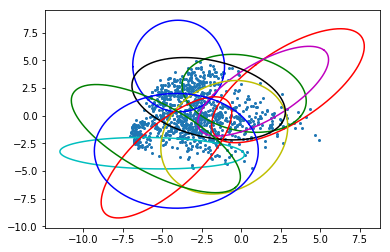

In [25]:
ngmm = 10

# get information of range on each dimension
dataRange = []
for i in range(data.shape[1]):
    dataRange.append({'MIN': min(data[:,i]), 'MAX': max(data[:,i])})
    
# randomly initialize Gaussian mixture model
mu    = randinitMean(ngmm, dataRange)
sigma = randinitCovariance(ngmm)
gmm   = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0/ngmm} for m in range(ngmm)]

# show initial state
gmmplot(data, gmm)

unnormalized prior:  26.595483079267904
unnormalized prior:  47.49292147199823
unnormalized prior:  80.84926857671282
unnormalized prior:  11.133251643210645
unnormalized prior:  13.203916797909427
unnormalized prior:  183.5528999767243
unnormalized prior:  293.49911171214666
unnormalized prior:  53.535852729498025
unnormalized prior:  152.95398145907762
unnormalized prior:  137.18331255345385


/home/jonsnow/Repositories/bmcfarland491/gmmlib.py:33: RuntimeWarning: invalid value encountered in double_scalars
  posteriors[n] = [i/normalizing_constant for i in posteriors[n]]


unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan
unnormalized prior:  nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2734632  -0.45886362]
mean: [nan nan]


xn: [-2.434223  -3.1589522]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.434223  -3.1589522]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.434223  -3.1589522]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.434223  -3.1589522]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.434223  -3.1589522]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2269151   0.16842118]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2269151   0.16842118]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2269151   0.16842118]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2269151   0.16842118]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2269151   0.16842118]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2269151   0.16842118]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2269151   0.16842118]
mean: [nan 

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7599277 -1.0418569]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7599277 -1.0418569]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7599277 -1.0418569]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7599277 -1.0418569]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7599277 -1.0418569]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan



xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3100317 -1.1349659]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3100317 -1.1349659]
mean: [nan nan]
covar: [[n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.825967   -0.86296284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.825967   -0.86296284]
mean: [nan nan]
covar:

 [nan nan]]
prior: nan

xn: [-3.5298603  2.0446088]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.5298603  2.0446088]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.5298603  2.0446088]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.5298603  2.0446088]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.5298603  2.0446088]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2526164  2.6930027]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2526164  2.6930027]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2526164  2.6930027]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2526164  2.6930027]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2526164  2.6930027]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2526164  2.6930027]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2526164  2.6930027]
me

prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.969706  -3.1375613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.969706  -3.1375613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.969706  -3.1375613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.969706  -3.1375613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.969706  -3.1375613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9013033 -2.3842163]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9013033 -2.3842163]
me

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar:

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.662746 -2.347831]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.662746 -2.347831]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.662746 -2.347831]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.662746 -2.347831]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.662746 -2.347831]
mean: [n

prior: nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8698819 -2.241

xn: [-4.782793  1.121708]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.782793  1.121708]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.782793  1.121708]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.782793  1.121708]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.782793  1.121708]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar:

prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.425838  -1.4105048]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.632531  -0.8795788]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.632531  -0.8795788]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.632531  -0.8795788]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.632531  -0.8795788]
mean: [nan nan

 [nan nan]]
prior: nan

xn: [-3.7645602  2.768043 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7645602  2.768043 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7645602  2.768043 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7645602  2.768043 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7645602  2.768043 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7645602  2.768043 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7645602  2.768043 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
me

xn: [-6.546187  -1.4985521]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.546187  -1.4985521]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4432425  2.3107336]
mean: [nan nan]
covar: [[n

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5362644 -2.22364  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.446076  -1.8926948]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.446076  -1.8926948]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.446076  -1.8926948]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.446076  -1.8926948]
mean: [nan nan]
covar: [[n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7161262  2.5037062]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.2005925  1.7320901]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5803


xn: [-1.3130337 -2.5570765]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3130337 -2.5570765]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3130337 -2.5570765]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3130337 -2.5570765]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3130337 -2.5570765]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0996456  -0.37481892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0996456  -0.37481892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0996456  -0.37481892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0996456  -0.37481892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0996456  -0.37481892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0996456  -0.37481892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0996456  -0.37481892]
mean: [nan 

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.544382  -1.4315215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05602032 -0.4796272 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05602032 -0.4796272 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05602032 -0.4796272 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
pr

prior: nan

xn: [-1.9834595 -0.9202218]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9834595 -0.9202218]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1120338 -2.773788 ]
mean: [nan nan

xn: [0.28565133 0.6274823 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.28565133 0.6274823 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.28565133 0.6274823 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.28565133 0.6274823 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.28565133 0.6274823 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.28565133 0.6274823 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.8796334  -0.16734576]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.8796334  -0.16734576]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.8796334  -0.16734576]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.8796334  -0.16734576]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.8796334  -0.16734576]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.8796334  -0.16734576]
mean: [nan nan

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.191924   2.0099523]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9888296  2.7790983]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9888296  2.7790983]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9888

xn: [-6.5656633 -2.081489 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5656633 -2.081489 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.5656633 -2.081489 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.7757646 0.8776343]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.325161  -0.6312858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.325161  -0.6312858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3812575  2.0474467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2584443  2.7527502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2584443  2.7527502]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
pr

 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.588303   2.1568727]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.588303   2.1568727]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.588303   2.1568727]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.588303   2.1568727]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.588303   2.1568727]
me

xn: [-5.824429    0.90449214]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.948575  -0.3228249]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6689023 -1.6994668]
mean: [nan nan]
covar: [

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.5254364 -0.4319566]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.5254364 -0.4319566]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.5254364 -0.4319566]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.5254364 -0.4319566]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.227073   -0.05437309]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.227073   -0.05437309]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.227073   -0.05437309]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.227073   -0.05437309]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.227073   -0.05437309]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.227073   -0.05437309]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.227073   -0.05437309]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.62757874 -3.5229433 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.62757874 -3.5229433 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.62757874 -3.5229433 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.62757874 -3.5229433 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.019087   -0.18288541]
me

xn: [-2.5073128 -1.8975508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5073128 -1.8975508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5073128 -1.8975508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5073128 -1.8975508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5073128 -1.8975508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5073128 -1.8975508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8765457 -1.493602 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8765457 -1.493602 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8765457 -1.493602 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8765457 -1.493602 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8765457 -1.493602 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8765457 -1.493602 ]
mean: [nan nan]
covar: [[n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.9631796 -2.1031945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.035076  -0.5086645]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.035076  -0.5086645]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.035076  -0.5086645]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.0350

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.657388  -2.4713564]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.1344248  3.9391313]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.1344248  3.9391313]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.1344248  3.9391313]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.1344248  3.9391313]
mean: [nan nan]
covar: [[n

prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.628101  -0.8779321]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.9620026 -0.7571406]
mean: [nan nan

 [nan nan]]
prior: nan

xn: [-2.1688905 -1.412367 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.18

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6548057 -2.3057964]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6548057 -2.3057964]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6548057 -2.3057964]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6548057 -2.3057964]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6548057 -2.3057964]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6548057 -2.3057964]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8509805  0.9586352]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8509805  0.9586352]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8509805  0.9586352]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8509805  0.9586352]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8509805  0.9586352]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

 [nan nan]]
prior: nan

xn: [-2.6470466 -1.4646873]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5059953 -2.8135731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.6809607 -1.5370098]
me

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8786573  2.7130237]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8786573  2.7130237]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8786573  2.7130237]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7058673 -2.0281284]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n


xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.8828504  -0.08504641]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.8828504  -0.08504641]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.8828504  -0.08504641]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.8828504  -0.08504641]
mean: [nan nan]
c

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan

prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8352602  2.2282653]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8352602  2.2282653]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8352602  2.2282653]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8352602  2.2282653]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8352602  2.2282653]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8352602  2.2282653]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8352602  2.2282653]
mean

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.3697087  0.74171746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6026883 -2.3968234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6026883 -2.3968234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6026883 -2.3968234]
mean: [nan nan]
covar: [[n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.391538  -1.3569751]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.391538  -1.3569751]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.391538  -1.3569751]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.391538  -1.3569751]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.391538  -1.3569751]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.391538  -1.3569751]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.1923171 -0.1420146]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.1923171 -0.1420146]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [4.7282726e-01 1.3893843e-04]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [4.7282726e-01 1.3893843e-04]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [4.7282726e-01 1.3893843e-04]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [4.7282726e-01 1.3893843e-04]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [4.7282726e-01 1.3893843e-04]
mean: [nan nan]
covar: [

 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7128518   0.11071938]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7128518   0.11071938

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
me

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.4557614 -2.8764746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.4557614 -2.8764746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.4557614 -2.8764746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.4557614 -2.8764746]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.4557

prior: nan

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3814638 -3.6868792]
mean: [nan n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan 

 [nan nan]]
prior: nan

xn: [-0.5620929  1.2693772]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0759826  -0.48780185]


mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9702663  -0.06267858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior:

xn: [ 4.0949616  -0.13006084]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.2503424 -0.5829109]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.85868   -1.6966556]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.85868   -1.6966556]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1530724  3.230956 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [2.0415788 0.1017673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8382196 -1.3208494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.664151

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8041306 -2.504826 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8041306 -2.504826 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8041306 -2.504826 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.6929

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7845163 -0.9829414]
mean: [nan nan]
covar: [[n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763874  1.6965213]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3763

 [nan nan]]
prior: nan

xn: [-1.4103844  -0.22882241]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 3.7121828  -0.67140234]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5199566  -0.95109606]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5199566  -0.95109606]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5199566  -0.95109606]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5199566  -0.95109606]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5199566  -0.95109606]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.877705  -1.5408595]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.877705  -1.5408595]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.877705  -1.5408595]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.877705  -1.5408595]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.877705  -1.5408595]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.877705  -1.5408595]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2645679 -2.5172431]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.6077522 -0.7930716]
mean: [nan nan]
covar: [[n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1889262  1.9525392]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1889262  1.9525392]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.5027695 -2.8536825]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-1.3314242   0.13742608]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3314242   0.13742608]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3314242   0.13742608]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3314242   0.13742608]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3314242   0.13742608]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.3314242   0.13742608]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4345293  2.136505 ]
me

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.70628583 -0.903955  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8012475 -1.0975149]
mean: [n

 [nan nan]]
prior: nan

xn: [ 2.4300556  -0.75198406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.4300556  -0.75198406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.4300556  -0.75198406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.085835  2.569398]
mean: [nan nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.349448   2.5511847]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0546069  -0.40595502]
mean: [nan nan]


covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0848465  -0.38289553]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.4897027 -2.0935857]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prio

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.661951   -0.12155092]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.661951   -0.12155092]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.661951   -0.12155092]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.661951   -0.12155092]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.661951   -0.12155092]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.175637  -0.6910112]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.175637  -0.6910112]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.175637  -0.6910112]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.175637  -0.6910112]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.175637  -0.6910112]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.175637  -0.6910112]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.758792  -1.8241818]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.140077  -1.2415408]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.140077  -1.2415408]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.140077  -1.2415408]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.140077  -1.2415408]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.0989225  3.8693714]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.5620929  1.2693772]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.5620929  1.2693772]
me

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.524725    0.01076066]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.9083191  -0.48938134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.9083191  -0.48938134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.9083191  -0.48938134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.9083191  -0.48938134]
me

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7808425 -0.8776898]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [2.6115837 1.9380718]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [2.6115837 1.9380718]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [2.6115837 1.9380718]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [2.6115837 1.9


xn: [-6.125325  -0.7621058]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.125325  -0.7621058]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0102758  2.9336946]
mean: [nan nan]
covar: [[

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0042033  2.1765823]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0042033  2.1765823]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0042033  2.1765823]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0042033  2.1765823]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0042033  2.1765823]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.3941513 1.5506853]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.3941513 1.5506853]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.3941513 1.5506853]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.3941513 1.5506853]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.3941513 1.5506853]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.3941513 1.5506853]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.3

prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2772639 -1.0513945]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8004007 -2.0767212]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8004007 -2.0767212]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8004007 -2.0767212]
mean: [nan nan

xn: [-6.572351  -0.8954891]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.572351  -0.8954891]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.572351  -0.8954891]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.2577431  -0.18728338]
mean: [n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37860262 -3.2116034 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37860262 -3.2116034 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37860262 -3.2116034 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37860262 -3.2116034 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37860262 -3.2116034 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37860262 -3.2116034 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.229485  -1.9136983]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.229485  -1.9136983]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.229485  -1.9136983]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.229485  -1.9136983]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.229485  -1.9136983]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan



mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.081145   2.4049351]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.081145   2.4049351]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2791986  3.2819617]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.325161  -0.6312858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.325161  -0.6312858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420298  2.9244986]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.6420

 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.5535734  0.7751229]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8703623  4.2918506]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8703623  4.2918506]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8703623  4.2918506]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8703623  4.2918506]
me

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17799968  2.22379   ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6353077  2.3140178]
mean: [nan nan]
covar: [[nan nan]
 [

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1543162 -0.6693705]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3003068 -0.86631  ]
mean: [nan nan]
covar: [[n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2692337 -1.4659994]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2692337 -1.4659994]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2692337 -1.4659994]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2692337 -1.4659994]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2692337 -1.4659994]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2692337 -1.4659994]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan na

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [

 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3671627  2.9230218]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3671627  2.9230218]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3671627  2.9230218]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3671627  2.9230218]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3671627  2.9230218]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3671627  2.9230218]
me

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0685992  -0.28818923]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0685992  -0.28818923]
me

 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.55858    1.8397949]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
me

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1550775  -0.29132515]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1550775  -0.29132515]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1550775  -0.29132515]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.960453   0.2596141]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.823217  -2.5574977]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.67588305 -3.5924413 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.67588305 -3.5924413 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.67588305 -3.5924413 ]
mean: [nan nan]
cova

 [nan nan]]
prior: nan

xn: [ 0.29819134 -1.0868796 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.642514 -1.536473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.9793601  2.255085 ]
mean: [nan nan]
cova

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2615716   0.26948512]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2615716   0.26948512]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2615716   0.26948512]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2615716   0.26948512]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2615716   0.26948512]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2615716   0.26948512]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.614131    0.52584076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.614131    0.52584076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.614131    0.52584076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.614131    0.52584076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.614131    0.52584076]
mean: [nan nan]
covar: [[nan nan

prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.015884 -1.405067]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [2.8765616 0.5993743]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [2.8765616 0.5993743]
mean: [nan nan]
covar: [[nan nan]
 [na

xn: [-1.4549499  3.4358613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.4549499  3.4358613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.4549499  3.4358613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.4549499  3.4358613]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.276658   2.4930406]
mean: [nan nan]
covar: [[n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.366843   -0.10974574]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4429994  -0.06533069]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
pr

xn: [-0.21947864 -1.9383458 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.21947864 -1.9383458 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.21947864 -1.9383458 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.21947864 -1.9383458 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.21947864 -1.9383458 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.21947864 -1.9383458 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.7309537  -0.10320485]
me

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5463893  -0.56702316]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.041018  2.636749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.588503

prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1759256  -0.19213177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2948864 -1.3524177

xn: [-3.045777   2.2244177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.045777   2.2244177]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.362105    0.20340803]
mean: 

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1746411 -1.469577 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1746411 -1.469577 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1746411 -1.469577 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1746411 -1.469577 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1746411 -1.469577 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152975 -1.032785 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.4152

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.0351467  1.6818147]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.3756065 -1.0919526]
mean: [nan nan]
covar: [[n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7088056  3.2450836]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7576146  1.8883855]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.816085  -2.1443205]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.7584558 -1.1185597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.52769    -0.18987796]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.07850179 -3.2248864 ]
mean: [nan nan]
covar: [[nan nan

 [nan nan]]
prior: nan

xn: [-2.4860988   0.84598863]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4860988   0.84598863]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4860988   0.84598863]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.4943508]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6241493 -0.49435

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3454218   0.12529464]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.113894   3.1152773]
mean: [nan n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.82432   -1.7046981]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8385987  -0.39669365]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.83

prior: nan

xn: [-0.5620929  1.2693772]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.5620929  1.2693772]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.5620929  1.2693772]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.5620929  1.2693772]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7729683  1.7842494]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8824837  0.8296604]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9702663  -0.06267858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9702663  -0.06267858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9702663  -0.06267858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9702663  -0.06267858]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]


xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.668535  -0.9729492]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3328786 -1.0399607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3328786 -1.0399607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3328786 -1.0399607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3328786 -1.0399607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3328786 -1.0399607]
mean: [nan nan]
covar: [[n

xn: [-5.003711   1.0613834]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.003711   1.0613834]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.003711   1.0613834]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.003711   1.0613834]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.003711   1.0613834]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.889653   -0.61340934]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.889653   -0.61340934]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.889653   -0.61340934]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.889653   -0.61340934]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.889653   -0.61340934]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.889653   -0.61340934]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.889653   -0.61340934]
mean: [nan n

xn: [-5.1662517 -1.2650731]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.0312734  1.1667387]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0289855   0.03631157]
mean: [nan nan]
covar: [

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6453097 -3.616911 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6453097 -3.616911 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6453097 -3.616911 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6453097 -3.616911 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492828  3.9431577]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0492

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4208012  1.0747421]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.8560661   0.69299096]
mean: [nan nan]
co

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.833069   2.7369113]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2045939  0.6713822]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [ 0.09517244 -0.36516985]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.09517244 -0.36516985]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.09517244 -0.36516985]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.09517244 -0.36516985]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.09517244 -0.36516985]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.1617243  3.6458547]
mean

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.072459   2.7692459]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.705802  -1.0678662]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

 [nan nan]]
prior: nan

xn: [-3.7387326 -2.380289 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7387326 -2.380289 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.9511812  2.676239 ]
me

xn: [ 0.7694746  -0.48488685]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.7694746  -0.48488685]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.7694746  -0.48488685]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.7694746  -0.48488685]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.7694746  -0.48488685]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.7694746  -0.48488685]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.518923  -1.7362018]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.518923  -1.7362018]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.518923  -1.7362018]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.518923  -1.7362018]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.518923  -1.7362018]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.518923  -1.7362018]
mean: [nan nan

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2515383  3.0403597]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.62003845 0.87967926]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.62003845 0.87967926]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [0.62003

prior: nan

xn: [-6.9812536 -1.493361 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9812536 -1.493361 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9812536 -1.493361 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.17420879]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.63779    -0.174208

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05281815 -0.7849777 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05281815 -0.7849777 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05281815 -0.7849777 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05281815 -0.7849777 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05281815 -0.7849777 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.05281815 -0.7849777 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5575886   0.05475581]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5575886   0.05475581]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5575886   0.05475581]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5575886   0.05475581]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5575886   0.05475581]
mean: [nan nan]
covar: [[nan nan

prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9317468 -3.8097467]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4805126  -0.18100846]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.4805126  -0.18100846]
mean: [nan

xn: [-2.679408   2.5612226]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.679408   2.5612226]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.679408   2.5612226]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.679408   2.5612226]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7322888 -1.7691134]
mean: [nan nan]
covar: [[n

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.842842   -0.47171417]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.842842   -0.47171417]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.842842   -0.47171417]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.842842   -0.47171417]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.842842   -0.47171417]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.842842   -0.47171417]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.842842   -0.47171417]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3509026 -1.9263551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3509026 -1.9263551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3509026 -1.9263551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3509026 -1.9263551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.89225435 -3.0674906 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.89225435 -3.0674906 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.89225435 -3.0674906 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.89225435 -3.0674906 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.89225435 -3.0674906 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.89225435 -3.0674906 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5719709 -2.0968451]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5719709 -2.0968451]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5719709 -2.0968451]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5719709 -2.0968451]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5719709 -2.0968451]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.5719709 -2.0968451]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.058889   0.9898892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.058889   0.9898892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.058889   0.9898892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.058889   0.9898892]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.3721213 -1.6689076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.3721213 -1.6689076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.3721213 -1.6689076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.3721213 -1.6689076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.3721213 -1.6689076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.3721213 -1.6689076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.3721213 -1.6689076]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4841075 -1.6039635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1902223  0.5583806]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1902223  0.5583806]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1902223  0.5583806]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1902223  0.5583806]
mean: [nan nan

xn: [-3.4484468  2.296274 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4484468  2.296274 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.343026    0.81297946]
mean: 

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.143613  -1.5686433]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.143613  -1.5686433]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.143613  -1.5686433]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.143613  -1.5686433]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.143613  -1.5686433]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.965334  -2.6944072]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.965334  -2.6944072]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.965334  -2.6944072]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.965334  -2.6944072]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.965334  -2.6944072]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.965334  -2.6944072]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9653

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1729083 -0.9912607]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.940349    0.15277255]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.940349    0.15277255]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prio

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.082849   -0.01176333]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4318902  0.2343374]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior:

prior: nan

xn: [ 1.50405   -2.2764227]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.50405   -2.2764227]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.50405   -2.2764227]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.50405   -2.2764227]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.50405   -2.2764227]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.50405   -2.2764227]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0422926  4.0144215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0422926  4.0144215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0422926  4.0144215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0422926  4.0144215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0422926  4.0144215]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.0422926  4.0144215]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.277846   2.6423912]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1644193 -1.1087521]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.1644193 -1.1087521]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

 [nan nan]]
prior: nan

xn: [-4.043275   -0.01081592]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.043275   -0.01081592]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.043275   -0.01081592]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.556401  4.276551]
mean: [nan nan

xn: [-6.51948   -2.6319997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.51948   -2.6319997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.51948   -2.6319997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.51948   -2.6319997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.51948   -2.6319997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.51948   -2.6319997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.51948   -2.6319997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.9178811  -0.90661395]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.9178811  -0.90661395]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.9178811  -0.90661395]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.9178811  -0.90661395]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 1.9178811  -0.90661395]
mean: [nan nan]


covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9718604   0.04322839]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.33912385 -2.0946283 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
pr

prior: nan

xn: [-6.567668  -2.3918178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.567668  -2.3918178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.567668  -2.3918178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.567668  -2.3918178]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.550519  -2.1035478]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.820591   2.8909473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.820591   2.8909473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.820591   2.8909473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.820591   2.8909473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.820591   2.8909473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.820591   2.8909473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.820591   2.8909473]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3822372  2.2057638]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3822372  2.2057638]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3822372  2.2057638]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.3822372  2.2057638]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-3.4300017 -2.06971  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.15808839 -2.000699  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2692337 -1.465

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.5775757   0.31227016]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7585762 -2.1018803]
mean: [nan nan]


covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.9743446 -1.5880673]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7807522   0.10369933]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-


xn: [-5.347097   -0.12490749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.347097   -0.12490749]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8360605  1.7722663]
mean: [nan nan]
covar

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2632854  1.2104774]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2632854  1.2104774]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2632854  1.2104774]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2632854  1.2104774]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.2632854  1.2104774]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.641454    0.30488974]
mean: [nan nan]
covar: [[nan nan]
 [nan na

prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.7993796 -0.9701267]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8017085 -0.7122443]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8017085 -0.7122443]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8017085 -0.7122443]
mean: [nan nan

xn: [ 0.03217888 -0.3055958 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.03217888 -0.3055958 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.03217888 -0.3055958 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.1688204 -1.404175 ]
mean: [nan nan]
cova

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1688905 -1.412367 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1688905 -1.412367 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1688905 -1.412367 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1688905 -1.412367 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1688905 -1.412367 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.1688905 -1.412367 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.6155715  -0.01452303]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.8316753  1.300514 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.139151  -1.0956415]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.139151  -1.0956415]
mean: [nan nan]
covar: [[n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.6809607 -1.5370098]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.6809607 -1.5370098]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.6809607 -1.5370098]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.433679   3.9219384]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-2.4781797  2.835846 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4781797  2.835846 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4781797  2.835846 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4781797  2.835846 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4781797  2.835846 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4781797  2.835846 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.4781797  2.835846 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17975605  4.046631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17975605  4.046631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17975605  4.046631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17975605  4.046631  ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.17975605  4.046631  ]
mean

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.36179638 -1.0705228 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9133685  1.533387 ]
mean: [nan nan]
covar: [[nan nan]


 [nan nan]]
prior: nan

xn: [-3.0668626 -1.3832635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0668626 -1.3832635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0668626 -1.3832635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0668626 -1.3832635]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.6528091  2.451416 ]
me

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.6239333  -0.72779083]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3235183 -2.1732447]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3235183 -2.1732447]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3235183 -2.1732447]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.3235183 -2.1732447]
mean: [nan

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.8092194 -2.4836423]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.363329    0.50505483]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prio

prior: nan

xn: [-3.8016818  1.860575 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8016818  1.860575 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8016818  1.860575 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8016818  1.860575 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.8016818  1.860575 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2807674  1.0014337]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2807674  1.0014337]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2807674  1.0014337]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2807674  1.0014337]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2807674  1.0014337]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2807674  1.0014337]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.2807674  1.0014337]
mean: [nan nan

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.5313838 0.1847437]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.6313491 -1.9594997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.6313491 -1.9594997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.6313491 -1.9594997]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 0.6313

prior: nan

xn: [ 4.6579647 -1.7502878]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 4.6579647 -1.7502878]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.4991302 -2.0195527]
mean: [nan nan

xn: [-5.929859 -0.654911]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.929859 -0.654911]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.929859 -0.654911]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.929859 -0.654911]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.929859 -0.654911]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.929859 -0.654911]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2429743 -1.2879169]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2429743 -1.2879169]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2429743 -1.2879169]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2429743 -1.2879169]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2429743 -1.2879169]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.2429743 -1.2879169]
mean: [nan nan]
covar: [[nan nan]
 [na

covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.9253697 -1.0672406]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7462716 -2.4730957]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7462716 -2.4730957]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-6.7462


xn: [-5.1120706  1.895088 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1120706  1.895088 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.1120706  1.895088 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.8233451   0.14283079]
mean: [

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0885587  3.0354724]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0885587  3.0354724]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0885587  3.0354724]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0885587  3.0354724]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0885587  3.0354724]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0885587  3.0354724]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.54651    -0.69722587]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.54651    -0.69722587]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.54651    -0.69722587]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.54651    -0.69722587]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.54651    -0.69722587]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]

prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.7337446  -0.56257504]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.0828643  -0.16213429]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [ 2.0828643  -0.

xn: [-3.198812  4.255632]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.198812  4.255632]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.198812  4.255632]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.198812  4.255632]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-5.3542066  2.4224153]
mean: [nan nan]
covar: [[nan nan]


covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7260219 -1.1991874]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7260219 -1.1991874]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7260219 -1.1991874]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7260219 -1.1991874]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7260219 -1.1991874]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7260219 -1.1991874]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.7260219 -1.1991874]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0056472   0.13970733]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0056472   0.13970733]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0056472   0.13970733]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.0056472   0.13970733]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: 

xn: [-5.2987833  2.110653 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-2.9457867 -1.5760317]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.0333977 -1.00678  ]
mean: [nan nan]
covar: [[n

mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.6230764  0.43526736]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.6230764  0.43526736]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.6230764  0.43526736]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [1.6230764  0.43526736]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9964733  1.5630813]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9964733  1.5630813]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9964733  1.5630813]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9964733  1.5630813]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9964733  1.5630813]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9964733  1.5630813]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-4.9964733  1.5630813]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: n

prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-3.31293   2.065838]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-7.015854 -1.831538]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-7.015854 -1.831538]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-7.015854 -1.831538]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-7.015854 -1.831538]
mean: [nan nan]
covar: [[nan nan]
 [na

 [nan nan]]
prior: nan

xn: [-1.626976   3.5680232]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.626976   3.5680232]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.626976   3.5680232]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-1.626976   3.5680232]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184  0.7561787 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184  0.7561787 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184  0.7561787 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184  0.7561787 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184  0.7561787 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184  0.7561787 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184  0.7561787 ]
mean: [nan nan]
covar: [[nan nan]
 [nan nan]]
prior: nan

xn: [-0.37137184

LinAlgError: Array must not contain infs or NaNs

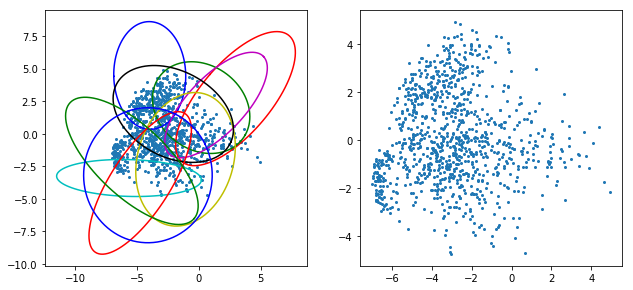

In [29]:
from gmmlib import expectation, maximization

gmmcp = copy.deepcopy(gmm)

# create figure
plt.figure(figsize=(16, 16))
# improve model with EM-Algorithm
for i in range(8):
    # plot current status
    plt.subplot(331 + i)
    gmmplot(data, gmmcp)
    # excute EM-Algorithm
    for j in range(5):
        posterior = expectation(data, gmmcp)
        gmmcp = maximization(posterior, data, gmmcp)
# plot final status
plt.subplot(339)
gmmplot(data,gmmcp)